In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




In [2]:
colors = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # yellow-green
    '#17becf'   # cyan
]


In [3]:
import pandas as pd

# Input data
runtime_data = {
    "store_conf": [
        "SSD 4n", "SSD 8n", "SSD 16n", 
        "TMPFS 4n", "TMPFS 8n", "TMPFS 16n", 
        "BeeGFS 4n", "BeeGFS 8n", "BeeGFS 16n"
    ],
    "idfea+single": [238.1148431, 221.1340433, 216.5786024, 236.2652814, 222.4809598, 207.3192828, 248.8221241, 240.8911947, 217.648033],
    "single+tracks": [85.39300521, 83.22719378, 82.1932346, 84.10632527, 84.21744786, 83.2219469, 88.5063544, 86.82145383, 85.62161539],
    "tracks+stats": [34.73873906, 33.00689697, 31.5051286, 34.48655093, 33.44193986, 32.72673739, 35.45224169, 35.66574605, 34.07590289],
    "stats+idfymcs": [7.828881252, 6.944111175, 6.719615787, 7.803608047, 7.1738463, 6.789142895, 8.041726648, 7.185589556, 6.921177248],
    "idfymcs+matchpf": [21.48382742, 19.26783775, 18.91059458, 21.2781235, 19.88184114, 19.10064979, 21.50030989, 19.53303158, 19.03362237],
    "matchpf+robustmcs": [23.68887598, 21.24523054, 21.10198329, 23.43891196, 21.84594694, 20.925671, 24.03150145, 21.13977243, 21.36371392],
    "robustmcs+mapfea": [20.45552399, 18.96286013, 18.55035554, 20.48561967, 19.34293848, 18.37734126, 20.93343674, 14.85026101, 20.31170977],
    "mapfea+speed": [24.65035105, 21.88203681, 21.03822682, 24.82500701, 22.70216893, 21.28798851, 25.38673986, 16.79745044, 20.74087643]
}

# Create DataFrame
df = pd.DataFrame(runtime_data)

# Construct result dictionary
runtime_rank_dict = {}
for col in df.columns[1:]:  # exclude 'store_conf'
    sorted_df = df[['store_conf', col]].sort_values(by=col)
    rankings = {row['store_conf']: rank + 1 for rank, row in enumerate(sorted_df.to_dict('records'))}
    runtime_rank_dict[col] = [
        {
            "store_conf": row['store_conf'],
            "runtime": row[col],
            "rank": rankings[row['store_conf']]
        }
        for _, row in df.iterrows()
    ]

# Display runtime_rank_dict dictionary
import json
print(json.dumps(runtime_rank_dict, indent=2))


{
  "idfea+single": [
    {
      "store_conf": "SSD 4n",
      "runtime": 238.1148431,
      "rank": 7
    },
    {
      "store_conf": "SSD 8n",
      "runtime": 221.1340433,
      "rank": 4
    },
    {
      "store_conf": "SSD 16n",
      "runtime": 216.5786024,
      "rank": 2
    },
    {
      "store_conf": "TMPFS 4n",
      "runtime": 236.2652814,
      "rank": 6
    },
    {
      "store_conf": "TMPFS 8n",
      "runtime": 222.4809598,
      "rank": 5
    },
    {
      "store_conf": "TMPFS 16n",
      "runtime": 207.3192828,
      "rank": 1
    },
    {
      "store_conf": "BeeGFS 4n",
      "runtime": 248.8221241,
      "rank": 9
    },
    {
      "store_conf": "BeeGFS 8n",
      "runtime": 240.8911947,
      "rank": 8
    },
    {
      "store_conf": "BeeGFS 16n",
      "runtime": 217.648033,
      "rank": 3
    }
  ],
  "single+tracks": [
    {
      "store_conf": "SSD 4n",
      "runtime": 85.39300521,
      "rank": 6
    },
    {
      "store_conf": "SSD 8n",
      "run

In [4]:
import pandas as pd

# Input data
spm_data = {
    "store_conf": [
        "SSD 4n", "SSD 8n", "SSD 16n",
        "TMPFS 4n", "TMPFS 8n", "TMPFS 16n",
        "BeeGFS 4n", "BeeGFS 8n", "BeeGFS 16n"
    ],
    # "idfea+single": [94.95032801]*3 + [0.568683973]*3 + [188.0677783]*3,
    # "single+tracks": [92.33204838]*3 + [73.10502809]*3 + [4.64E-07]*3,
    # "tracks+stats": [0.372025588]*3 + [0.14669451]*3 + [1.047029848]*3,
    # "stats+idfymcs": [0.367]*3 + [0.0049]*3 + [1.06]*3,
    # "idfymcs+matchpf": [0.60702416]*3 + [0.018587404]*3 + [1.184708436]*3,
    # "matchpf+robustmcs": [0.448048717]*3 + [0.009013307]*3 + [1.142949971]*3,
    # "robustmcs+mapfea": [0.639612859]*3 + [0.243642234]*3 + [1.168209355]*3,
    # "mapfea+speed": [101.6289765]*3 + [74.20931779]*3 + [4.10361E-05]*3

    "idfea+single": [ # data stage_in + p+c
        (0.23698448168492559+2.5416757014256923),(0.21836851961416337+1.6003048750385411),(0.017633093248698876+0.8306723587540179),
        (0.2386816124685993+0.061218019624040304),(0.077300761+0.10399941107898539),(0.022548212+0.058521733),
        (0.36431810181511337 + 0.7980953049067298),(0.3075848241435679 + 0.5226269767758889), (0.3539576486837463+ 0.4606741972417835)
    ],
    "single+tracks": [ # data stage_in + p+c
        (0.020307235382015686+0.042059373183790036),(0.0377643537732764+0.0332434203291701),(0.024203809605868817+0.025029386568163104),
        (0.021032925+0.022102163199555692),(0.019500498+0.0425731748684182),(0.015707878252961077+0.027431046985198285),
        (0.16446931360071138+0.21911870236521583),(0.14667748257491203+0.1933842149732143),(0.1528953167960549+0.21543217644335175),
    ],
    "tracks+stats": [
        (0.21390622189475908+0.055518861),(0.2122022186761755+0.042962537),(0.19046617344987454+0.028685232626440987),
        (0.021737168734535132+0.045243718),(0.04194818+0.064863529),(0.027136006632154996+0.035561725112660356),
        (0.21390622189475908+0.4271801718637509),(0.19046617344987454+0.3675223752992452),(0.2122022186761755+0.41826363627042723),
    ],
    "stats+idfymcs": [
        (0.053611662+0.03534893),(0.041837756+0.021705774),(0.028012098778443906+0.012760056),
        (0.045217472539496546+0.00231401),(0.064696649+0.00285332672945108),(0.035424332+0.002270637),
        (0.4268261769107149+0.013760799712319503),(0.36722034681085663+0.011455969958397684),(0.41797213812277173+0.012324825),
    ],
    "idfymcs+matchpf": [
        (0.001599491+0.032896222),(0.001599491+0.032896222),(0.001599491+0.032896222),
        (0.001648347+0.012553245),(0.001648347+0.012553245),(0.001648347+0.012553245),
        (0.007343139+0.032769356456827374),(0.007343139+0.032769356456827374),(0.007343139+0.032769356456827374),
    ],
    "matchpf+robustmcs": [
        (0.082775631+0.041240498),(0.061204087+0.041240498),(0.030545487796128184+0.041240498),
        (0.071125047+0.016311583914731354),(0.079060709+0.016311583914731354),(0.038762271+0.016311583914731354),
        (0.6292321461819804+0.042889571),(0.5320464899991307+0.042889571),(0.6108350858102581+0.042889571),
    ],
    # "robustmcs+mapfea": [ # run_idfea? + mapfea
    #     (0.007392143+2.6060057069383293),(0.007392143+1.6430542968793718),(0.007392143+0.8462894179244568),
    #     (0.007011363+0.11203187263022163),(0.007011363+0.145348239),(0.007011363+0.073132074),
    #     (0.020515663796524763+1.2626675464309205),(0.020515663796524763+0.9079684575167967),(0.020515663796524763+0.9186556253311824),

    # ],
    "robustmcs+mapfea": [ # run_idfea? + mapfea
        (0.007392143+2.6060057069383293),(0.007392143+1.6430542968793718),(0.007392143+0.8462894179244568),
        (0.007011363+0.11203187263022163),(0.007011363+0.145348239),(0.007011363+0.073132074),
        (0.020515663796524763+1.2626675464309205),(0.020515663796524763+0.9079684575167967),(0.020515663796524763+0.9186556253311824),

    ],
    "mapfea+speed": [
        (0.082775631+3.1364343035290148),(0.061204087+1.8821916019955056),(0.030545487796128184+1.0060729254163885),
        (0.071125047+0.097271817),(0.079060709+0.13082014974128026),(0.038762271+0.068632251),
        (0.6292321461819804+1.0615144116573774),(0.5320464899991307+0.7564987111622004),(0.6108350858102581+0.7620368130909647),
    ]

}

df = pd.DataFrame(spm_data)

# Helper to extract number of nodes
def extract_nodes(conf):
    return int(conf.split()[1][:-1])

# Construct dictionary
spm_rank_dict = {}
for column in df.columns[1:]:
    # Rank using value ascending, then node count descending
    sorted_df = df.sort_values(
        by=[column, "store_conf"],
        key=lambda col: (
            col if col.name != "store_conf" else col.map(lambda x: -extract_nodes(x))
        ),
        ascending=[True, True]
    ).reset_index()

    # Build a lookup table for ranks
    rank_lookup = {
        df.loc[i, "store_conf"]: rank + 1 for rank, i in enumerate(sorted_df["index"])
    }

    # Store spm_rank_dict per column
    spm_rank_dict[column] = [
        {
            "store_conf": row["store_conf"],
            "runtime": row[column],
            "rank": rank_lookup[row["store_conf"]]
        }
        for _, row in df.iterrows()
    ]

# Optional: print or export
import json
print(json.dumps(spm_rank_dict, indent=2))


{
  "idfea+single": [
    {
      "store_conf": "SSD 4n",
      "runtime": 2.7786601831106177,
      "rank": 9
    },
    {
      "store_conf": "SSD 8n",
      "runtime": 1.8186733946527045,
      "rank": 8
    },
    {
      "store_conf": "SSD 16n",
      "runtime": 0.8483054520027168,
      "rank": 6
    },
    {
      "store_conf": "TMPFS 4n",
      "runtime": 0.2998996320926396,
      "rank": 3
    },
    {
      "store_conf": "TMPFS 8n",
      "runtime": 0.18130017207898538,
      "rank": 2
    },
    {
      "store_conf": "TMPFS 16n",
      "runtime": 0.081069945,
      "rank": 1
    },
    {
      "store_conf": "BeeGFS 4n",
      "runtime": 1.1624134067218432,
      "rank": 7
    },
    {
      "store_conf": "BeeGFS 8n",
      "runtime": 0.8302118009194568,
      "rank": 5
    },
    {
      "store_conf": "BeeGFS 16n",
      "runtime": 0.8146318459255297,
      "rank": 4
    }
  ],
  "single+tracks": [
    {
      "store_conf": "SSD 4n",
      "runtime": 0.062366608565805726,
  

In [5]:
import pandas as pd

def compute_rank_error(runtime_rank_dict, spm_rank_dict):
    stages = list(runtime_rank_dict.keys())
    num_ranks = len(runtime_rank_dict[stages[0]])  # Typically 9
    rank_error_table = []

    for rank_idx in range(num_ranks):  # R1 to R9
        rank_row = []
        for stage in stages:
            # Find store_conf predicted by SPM at current rank
            spm_entry = next((entry for entry in spm_rank_dict[stage] if entry["rank"] == rank_idx + 1), None)
            if not spm_entry:
                rank_row.append(None)
                continue
            predicted_conf = spm_entry["store_conf"]

            # Find actual rank of the predicted store_conf
            actual_entry = next((entry for entry in runtime_rank_dict[stage] if entry["store_conf"] == predicted_conf), None)
            if not actual_entry:
                rank_row.append(None)
                continue
            actual_rank = actual_entry["rank"]

            # Calculate absolute difference
            rank_error = abs((rank_idx + 1) - actual_rank)
            rank_row.append(rank_error)
        rank_error_table.append(rank_row)

    # Format as DataFrame
    rank_labels = [f"R{i+1}" for i in range(num_ranks)]
    df_rank_error = pd.DataFrame(rank_error_table, columns=stages, index=rank_labels)
    return df_rank_error

# Example usage:
rank_error_table = compute_rank_error(runtime_rank_dict, spm_rank_dict)
print(rank_error_table)


    idfea+single  single+tracks  tracks+stats  stats+idfymcs  idfymcs+matchpf  \
R1             0              3             1              1                2   
R2             3              0             4              1                4   
R3             3              2             1              4                4   
R4             1              1             3              0                3   
R5             3              1             2              0                1   
R6             4              3             1              2                2   
R7             2              1             2              1                5   
R8             4              1             3              5                3   
R9             2              0             1              0                0   

    matchpf+robustmcs  robustmcs+mapfea  mapfea+speed  
R1                  0                 1             3  
R2                  0                 6             6  
R3                  4

In [6]:
import pandas as pd

def compute_local_rank_deviation(runtime_rank_dict, spm_rank_dict):
    stages = list(runtime_rank_dict.keys())
    num_ranks = len(runtime_rank_dict[stages[0]])  # Typically 9 ranks
    penalty_table = []

    for rank_idx in range(num_ranks):  # R1 to R9
        rank_row = []
        for stage in stages:
            # Get the actual store_conf at this rank
            actual_entry = next((entry for entry in runtime_rank_dict[stage] if entry["rank"] == rank_idx + 1), None)
            # print(f"R[{rank_idx}] actual_entry:{actual_entry}")
            if not actual_entry:
                rank_row.append(None)
                continue
            actual_conf = actual_entry["store_conf"]
            actual_runtime = actual_entry["runtime"]

            # Get the SPM-predicted rank for that same store_conf
            spm_entry = next((entry for entry in spm_rank_dict[stage] if entry["rank"] == rank_idx + 1), None)
            
            if not spm_entry:
                rank_row.append(None)
                continue
            spm_conf = spm_entry["store_conf"]
            spm_actual_entry = next((entry for entry in runtime_rank_dict[stage] if entry["store_conf"] == spm_conf), None)
            spm_runtime = spm_actual_entry["runtime"]
            # print(f"R[{rank_idx}] spm_runtime:{spm_runtime} ")

            # Compute penalty: can be negative or positive
            penalty_percent = 100 * (spm_runtime - actual_runtime) / actual_runtime
            rank_row.append(penalty_percent)
        penalty_table.append(rank_row)

    # Format as DataFrame
    rank_labels = [f"R{i+1}" for i in range(num_ranks)]
    df_penalty = pd.DataFrame(penalty_table, columns=stages, index=rank_labels)
    return df_penalty

# Example usage:
local_deviation_table = compute_local_rank_deviation(runtime_rank_dict, spm_rank_dict)
print(local_deviation_table)


    idfea+single  single+tracks  tracks+stats  stats+idfymcs  idfymcs+matchpf  \
R1      0.000000       2.327552      3.877492       1.034689         1.005020   
R2      2.725273       0.000000      5.377296      -1.024093         4.456423   
R3      8.553833      -1.242333      1.318036      12.749721        11.399998   
R4     -1.576424       0.132122     -5.791564       0.000000        -1.854091   
R5      8.274971       1.395860     -3.137132       0.000000        -1.357669   
R6     -8.332447      -2.536287      0.731265       8.952525         8.057535   
R7      4.496688       1.401327      2.668511      -7.919651       -10.548398   
R8     -8.201691      -1.381961     -3.882233     -11.594300        -9.080299   
R9     -4.303187       0.000000     -0.598626       0.000000         0.000000   

    matchpf+robustmcs  robustmcs+mapfea  mapfea+speed  
R1           0.000000         23.750965     26.733450  
R2           0.000000         11.472162     19.691215  
R3          10.875895

In [7]:
import pandas as pd

def compute_global_rank_deviation(runtime_rank_dict, spm_rank_dict):
    stages = list(runtime_rank_dict.keys())
    num_ranks = len(runtime_rank_dict[stages[0]])  # Typically 9 ranks
    penalty_table = []

    for rank_idx in range(num_ranks):  # R1 to R9
        rank_row = []
        for stage in stages:
            # Get the actual store_conf at this rank
            actual_entry = next((entry for entry in runtime_rank_dict[stage] if entry["rank"] == rank_idx + 1), None)
            # print(f"R[{rank_idx}] actual_entry:{actual_entry}")
            if not actual_entry:
                rank_row.append(None)
                continue
            actual_conf = actual_entry["store_conf"]
            actual_runtime = actual_entry["runtime"]

            # Get the SPM-predicted rank actual runtime of workflow with the same rank storages
            rank_runtime = 0
            for st in stages:
                entry = next((entry for entry in runtime_rank_dict[st] if entry["rank"] == rank_idx + 1), None)
                rank_runtime += entry["runtime"]
            
            # Get the SPM-predicted rank actual runtime for that same store_conf
            spm_entry = next((entry for entry in spm_rank_dict[stage] if entry["rank"] == rank_idx + 1), None)
            
            if not spm_entry:
                rank_row.append(None)
                continue
            spm_conf = spm_entry["store_conf"]
            spm_actual_entry = next((entry for entry in runtime_rank_dict[stage] if entry["store_conf"] == spm_conf), None)
            spm_runtime = spm_actual_entry["runtime"]
            # print(f"R[{rank_idx}] spm_runtime:{spm_runtime} ")

            # Compute penalty: can be negative or positive
            penalty_percent = 100 * (spm_runtime - actual_runtime) / rank_runtime
            rank_row.append(penalty_percent)
        penalty_table.append(rank_row)

    # Format as DataFrame
    rank_labels = [f"R{i+1}" for i in range(num_ranks)]
    df_penalty = pd.DataFrame(penalty_table, columns=stages, index=rank_labels)
    return df_penalty

# Example usage:
global_deviation_table = compute_global_rank_deviation(runtime_rank_dict, spm_rank_dict)
print(global_deviation_table)


    idfea+single  single+tracks  tracks+stats  stats+idfymcs  idfymcs+matchpf  \
R1      0.000000       0.479206      0.305998       0.017416         0.047606   
R2      1.410123       0.000000      0.420434      -0.016611         0.202647   
R3      4.426015      -0.245811      0.103426       0.209787         0.517667   
R4     -0.817563       0.026061     -0.454234       0.000000        -0.083783   
R5      4.280754       0.273341     -0.248566       0.000000        -0.061663   
R6     -4.393641      -0.483362      0.056283       0.143569         0.357529   
R7      2.347564       0.263064      0.203246      -0.135500        -0.492105   
R8     -4.281285      -0.260000     -0.298246      -0.196695        -0.422729   
R9     -2.264232       0.000000     -0.045149       0.000000         0.000000   

    matchpf+robustmcs  robustmcs+mapfea  mapfea+speed  
R1           0.000000          0.883490      1.124824  
R2           0.000000          0.503686      0.975734  
R3           0.546591

# Below plot PyflexTRKR

R1: [0, 3, 1, 1, 2, 0, 1, 3]
R2: [3, 0, 4, 1, 4, 0, 6, 6]
R3: [3, 2, 1, 4, 4, 4, 2, 3]
R4: [1, 1, 3, 0, 3, 2, 1, 1]
R5: [3, 1, 2, 0, 1, 1, 4, 4]
R6: [4, 3, 1, 2, 2, 2, 0, 4]
R7: [2, 1, 2, 1, 5, 4, 2, 2]
R8: [4, 1, 3, 5, 3, 3, 4, 3]
R9: [2, 0, 1, 0, 0, 0, 2, 2]


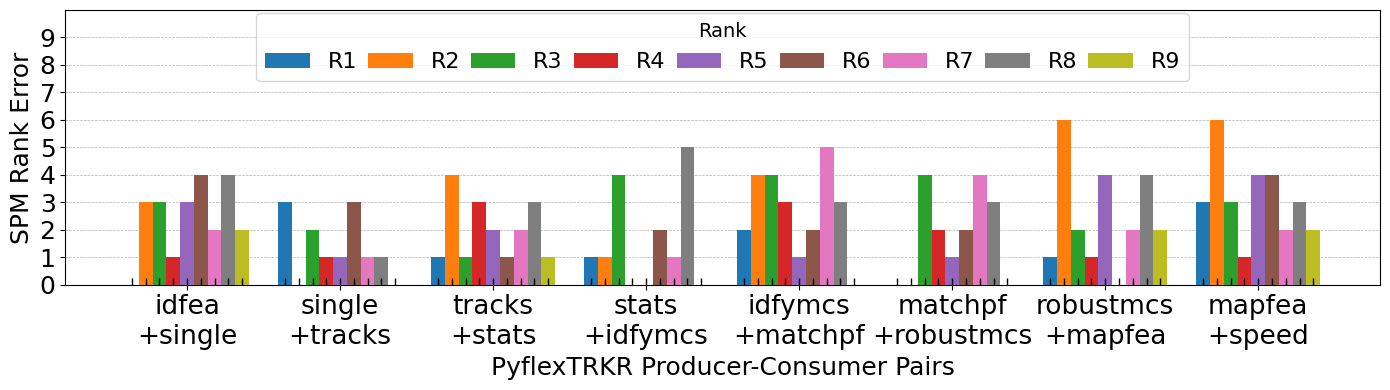

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Labels (workflows) and Ranks
labels = [
    'idfea\n+single', 'single\n+tracks', 'tracks\n+stats', 'stats\n+idfymcs',
    'idfymcs\n+matchpf', 'matchpf\n+robustmcs', 'robustmcs\n+mapfea', 'mapfea\n+speed'
]
ranks = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']

# Convert DataFrame to list of lists (row-wise values only)
rank_error = rank_error_table.values.tolist()

# Optional: Display the result
for i, row in enumerate(rank_error, start=1):
    print(f"R{i}: {row}")


# Bar plot config
x = np.arange(len(labels))
bar_width = 0.09

plt.figure(figsize=(14, 4))
for i in range(len(ranks)):
    plt.bar(x + i * bar_width, rank_error[i], width=bar_width, color=colors[i], label=ranks[i], zorder=3)

# Add tick for 0 bars
for i in range(len(ranks)):
    for j, val in enumerate(rank_error[i]):
        xpos = x[j] + i * bar_width
        plt.plot(xpos, 0, marker='|', color='black', markersize=10, zorder=4)

# Axis and legend
plt.xticks(x + (len(ranks) - 1) * bar_width / 2, labels, fontsize=19)
plt.yticks(np.arange(0, 10, 1), fontsize=18)
plt.ylim(0, len(ranks)+1)
plt.ylabel('SPM Rank Error', fontsize=18)
plt.xlabel('PyflexTRKR Producer-Consumer Pairs', fontsize=18)
# plt.title('SPM Rank Error', fontsize=18)
plt.grid(axis='y', linestyle='--', linewidth=0.5, zorder=0)

# Legend on top
plt.legend(title='Rank', title_fontsize=14,fontsize=16, ncol=9, loc='lower center',
           bbox_to_anchor=(0.5, 0.7), columnspacing=0.5)

plt.tight_layout()
plt.savefig("pyflex_spm_rank_error.pdf", format='pdf', bbox_inches='tight')
plt.show()


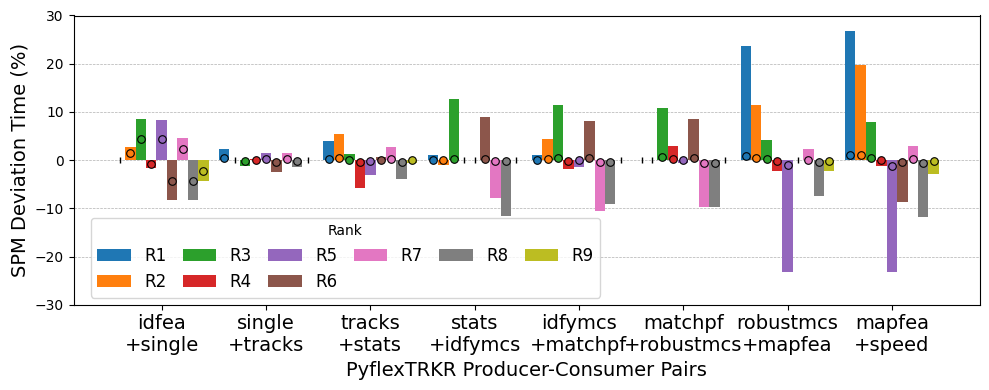

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Labels (workflows) and Ranks
labels = [
    'idfea\n+single', 'single\n+tracks', 'tracks\n+stats', 'stats\n+idfymcs',
    'idfymcs\n+matchpf', 'matchpf\n+robustmcs', 'robustmcs\n+mapfea', 'mapfea\n+speed'
]
ranks = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']

# Bar plot data
local_deviation = local_deviation_table.values.tolist()

# Line data to be plotted as points
global_deviation = global_deviation_table.values.tolist()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
x = np.arange(len(labels))
bar_width = 0.1

fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot bars
for i in range(len(ranks)):
    ax1.bar(x + i * bar_width, local_deviation[i], width=bar_width, color=colors[i], label=ranks[i], zorder=3)

# Tick marker for 0 bars
for i in range(len(ranks)):
    for j, val in enumerate(local_deviation[i]):
        xpos = x[j] + i * bar_width
        if val == 0:
            ax1.plot(xpos, 0, marker='|', color='black', markersize=5, zorder=4)


# Plot global_deviation as scatter points (over bars), using same color
for i in range(len(ranks)):
    for j in range(len(labels)):
        xpos = x[j] + i * bar_width
        if global_deviation[i][j] != 0:
            ax1.scatter(
                xpos, global_deviation[i][j],
                color=colors[i],
                marker='o',
                s=30,
                edgecolors='black',  # Black outline
                linewidths=0.8,
                zorder=6
            )


# Axes setup
centered_x = x + ((len(ranks) - 1) * bar_width) / 2
ax1.set_xticks(centered_x)
ax1.set_xticklabels(labels, fontsize=14)
ax1.set_yticks(np.arange(-50, 51, 10))
ax1.set_ylim(-30, 30)
ax1.set_ylabel('SPM Deviation Time (%)', fontsize=14)
ax1.set_xlabel('PyflexTRKR Producer-Consumer Pairs', fontsize=14)
ax1.grid(axis='y', linestyle='--', linewidth=0.5, zorder=0)

# Legend
ax1.legend(title='Rank', fontsize=12, ncol=6, loc='upper center', bbox_to_anchor=(0.3, 0.33), columnspacing=1)

plt.tight_layout()
plt.savefig("pyflex_spm_time_deviation.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Error rate over 10% global margin of error: 0/72
# Error rate over 10% local margin of error: 14/72